In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk import sent_tokenize,word_tokenize 
import gensim.summarization

<h1> Staging the Data </h1>

<h2> Read the data files and concatenate </h2>

In [2]:
df1 = pd.read_csv('7282_1.csv')
df2 = pd.read_csv('Datafiniti_Hotel_Reviews_Jun19.csv')
df3 = pd.read_csv('Datafiniti_Hotel_Reviews.csv')

In [3]:
print('Number of observations in df1: ', len(df1))
print('Number of observations in df2: ', len(df2))
print('Number of observations in df3: ', len(df3))
print('Total number of observations in the raw dataset should then be: ', len(df1)+len(df2)+len(df3))

Number of observations in df1:  35912
Number of observations in df2:  10000
Number of observations in df3:  10000
Total number of observations in the raw dataset should then be:  55912


In [4]:
df = pd.concat([df1, df2, df3])

<h3>Examining the data in the Dataframe</h3>

<p>We can print out the info of the dataframe,to check the resulting dataframe</p>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55912 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   address               55912 non-null  object 
 1   categories            55912 non-null  object 
 2   city                  55912 non-null  object 
 3   country               55912 non-null  object 
 4   latitude              55826 non-null  float64
 5   longitude             55826 non-null  float64
 6   name                  55912 non-null  object 
 7   postalCode            55857 non-null  object 
 8   province              55912 non-null  object 
 9   reviews.date          55653 non-null  object 
 10  reviews.dateAdded     35912 non-null  object 
 11  reviews.doRecommend   0 non-null      float64
 12  reviews.id            0 non-null      float64
 13  reviews.rating        55050 non-null  float64
 14  reviews.text          55889 non-null  object 
 15  reviews.title       

<p>Several data columns are such that only 20,000 observations are non-null values, which is the total size of df2 and df3 together. This is indicative that these columns are not present in df1. More, many of these columns are extraneous as the information is already captured in the columns that they have in common with df1</p>

<h3>Merging the dataset with inner join</h3>

<p>Concatenating each dataframe such that only common columns are present in the resulting dataset.</p>

In [6]:
df = pd.concat([df1, df2, df3],join='inner',ignore_index=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55912 entries, 0 to 55911
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   address               55912 non-null  object 
 1   categories            55912 non-null  object 
 2   city                  55912 non-null  object 
 3   country               55912 non-null  object 
 4   latitude              55826 non-null  float64
 5   longitude             55826 non-null  float64
 6   name                  55912 non-null  object 
 7   postalCode            55857 non-null  object 
 8   province              55912 non-null  object 
 9   reviews.date          55653 non-null  object 
 10  reviews.rating        55050 non-null  float64
 11  reviews.text          55889 non-null  object 
 12  reviews.title         54288 non-null  object 
 13  reviews.userCity      30427 non-null  object 
 14  reviews.username      55869 non-null  object 
 15  reviews.userProvinc

<p>We can print out some sample rows to check to examine the data</p>

In [8]:
df.rename(columns = {
    col : f"{col} ({dtype})"
    for col, dtype in df.dtypes.to_dict().items()
}).sample(5, random_state = 0)

,address (object),categories (object),city (object),country (object),latitude (float64),longitude (float64),name (object),postalCode (object),province (object),reviews.date (object),reviews.rating (float64),reviews.text (object),reviews.title (object),reviews.userCity (object),reviews.username (object),reviews.userProvince (object)
12857,1071 E El Camino Real,Hotels,Sunnyvale,US,37.352307,-122.003242,Cherry Orchard Inn,94087,CA,2015-08-23T00:00:00Z,3.0,Arrived in our room to find hair in the bathtu...,OK stay for what was needed good be better.,NaN,TINA,NaN
31351,35 Via Pico Plz,Hotels,San Clemente,US,33.437538,-117.621732,Holiday Inn Express San Clemente,92672,CA,2016-03-25T00:00:00Z,4.0,Good convenient location. Very nice hotel.,This is an okay hotel.,West Columbia,A Traveler,SC
11350,741 E Washington St,"Cocktail Lounges,Restaurants,Hotels,Casinos,Lo...",Charles Town,US,39.293040,-77.850866,Turf Motel,25414,WV,2016-03-12T00:00:00Z,4.0,My husband and I have stayed at the Turf sever...,Turf Motel,Virginia,BettyKVirginia,VA
38032,100 Colleton Ave SW,"Hotels,Hotel,Restaurants",Aiken,US,33.557110,-81.721620,The Willcox,29801,SC,2016-04-30T00:00:00Z,1.0,I made a guaranteed reservation in October for...,Unilaterally cancelled my reservation...,Lewiston,barolobrunello,NY
12359,7070 Poe Ave,Hotels,Dayton,US,39.849845,-84.189419,Hawthorn Suites Dayton North,45414,OH,2016-06-15T00:00:00Z,4.0,"It was very clean (fresh)and quiet, staff was ...",WOW,NaN,michelle,NaN


<h2> Initial Data Cleaning </h2>

<p> Drop the columns with no observations </p>

In [9]:
df.dropna(axis = 'columns', how = 'all', inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55912 entries, 0 to 55911
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   address               55912 non-null  object 
 1   categories            55912 non-null  object 
 2   city                  55912 non-null  object 
 3   country               55912 non-null  object 
 4   latitude              55826 non-null  float64
 5   longitude             55826 non-null  float64
 6   name                  55912 non-null  object 
 7   postalCode            55857 non-null  object 
 8   province              55912 non-null  object 
 9   reviews.date          55653 non-null  object 
 10  reviews.rating        55050 non-null  float64
 11  reviews.text          55889 non-null  object 
 12  reviews.title         54288 non-null  object 
 13  reviews.userCity      30427 non-null  object 
 14  reviews.username      55869 non-null  object 
 15  reviews.userProvinc

Check out the reviews columns in more detail

In [11]:
df.loc[:, df.columns.str.startswith("review")]

,reviews.date,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,2013-09-22T00:00:00Z,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,2015-04-03T00:00:00Z,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,2014-05-13T00:00:00Z,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,2013-10-27T00:00:00Z,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,2015-03-05T00:00:00Z,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN
...,...,...,...,...,...,...,...
55907,2016-03-13T00:00:00Z,3.0,It is hard for me to review an oceanfront hote...,Picture Window Ocean View!,Wildwood,LASH0211,GA
55908,2015-12-11T00:00:00Z,4.0,"I live close by, and needed to stay somewhere ...","Clean, comfortable and quiet",East Sandwich,Gennaker,MA
55909,2017-11-17T00:00:00.000Z,4.0,Rolled in 11:30 laid out heads down woke up to...,Passing through,Montana,Amber406,UnitedStates
55910,2016-06-09T00:00:00Z,1.0,Absolutely terrible..I was told I was being gi...,Terrible,woodbury,donWoodbury,NaN


<p> Drop the rows where review ratings or review texts are not available</p>

In [12]:
df.dropna(subset = ['reviews.rating', 'reviews.text'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55027 entries, 0 to 55911
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   address               55027 non-null  object 
 1   categories            55027 non-null  object 
 2   city                  55027 non-null  object 
 3   country               55027 non-null  object 
 4   latitude              54951 non-null  float64
 5   longitude             54951 non-null  float64
 6   name                  55027 non-null  object 
 7   postalCode            54972 non-null  object 
 8   province              55027 non-null  object 
 9   reviews.date          54770 non-null  object 
 10  reviews.rating        55027 non-null  float64
 11  reviews.text          55027 non-null  object 
 12  reviews.title         54152 non-null  object 
 13  reviews.userCity      30299 non-null  object 
 14  reviews.username      54984 non-null  object 
 15  reviews.userProvinc

Rename the reviews columns

In [13]:
old_names = ['reviews.date', 'reviews.rating', 'reviews.title', 'reviews.text', 'reviews.userCity', 
             'reviews.username', 'reviews.userProvince'] 
new_names = ['date', 'rating', 'title', 'text', 'userCity', 'username', 'userProvince']
df.rename(columns = dict(zip(old_names, new_names)), inplace = True)

Replace the empty titles with an empty string instead of NaN

In [14]:
df['title'].fillna('', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55027 entries, 0 to 55911
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       55027 non-null  object 
 1   categories    55027 non-null  object 
 2   city          55027 non-null  object 
 3   country       55027 non-null  object 
 4   latitude      54951 non-null  float64
 5   longitude     54951 non-null  float64
 6   name          55027 non-null  object 
 7   postalCode    54972 non-null  object 
 8   province      55027 non-null  object 
 9   date          54770 non-null  object 
 10  rating        55027 non-null  float64
 11  text          55027 non-null  object 
 12  title         55027 non-null  object 
 13  userCity      30299 non-null  object 
 14  username      54984 non-null  object 
 15  userProvince  30109 non-null  object 
dtypes: float64(3), object(13)
memory usage: 7.1+ MB


# <h1> Preliminary Exploratory Data Analysis </h1>

<h2> Ratings distribution </h2>

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set()

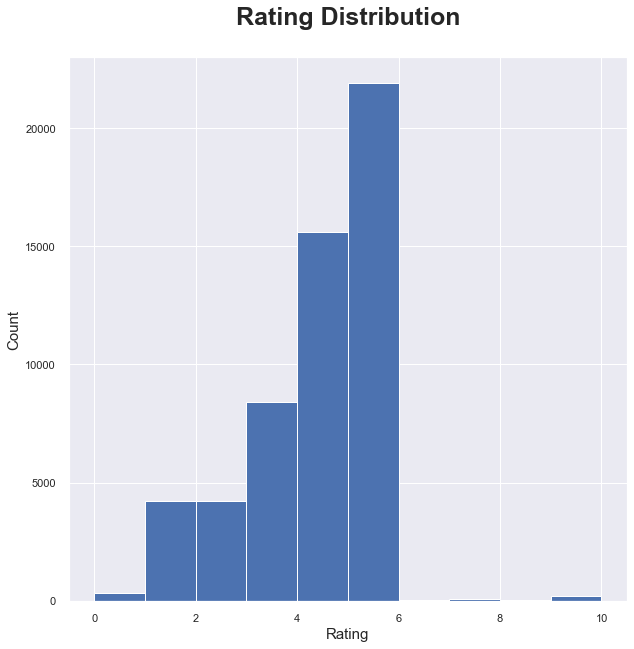

In [16]:
plt.figure(figsize=(10,10))

plt.hist(df['rating'], 10, density = False, 
         histtype ='bar')

plt.xlabel('Rating', fontdict = {'fontsize' : 15})
plt.ylabel('Count', fontdict = {'fontsize' : 15})
 
plt.title('Rating Distribution\n',
          fontweight ="bold", fontdict = {'fontsize' : 25})
  
plt.show()

In [17]:
df['rating'].unique()

array([ 4.  ,  5.  ,  3.  ,  1.  ,  2.  ,  0.  ,  4.1 ,  4.9 ,  4.8 ,
        3.4 ,  2.4 ,  3.1 ,  3.2 ,  3.3 ,  9.6 , 10.  ,  8.3 ,  8.8 ,
        9.2 ,  7.5 ,  7.9 ,  7.1 ,  3.8 ,  5.8 ,  6.7 ,  6.3 ,  4.2 ,
        4.5 ,  3.9 ,  1.3 ,  4.3 ,  4.7 ,  2.8 ,  4.4 ,  1.5 ,  4.6 ,
        3.7 ,  5.4 ,  2.5 ,  6.  ,  2.9 ,  7.  ,  9.5 ,  3.55,  4.15,
        3.95,  3.35,  3.75,  2.1 ,  1.65,  3.15,  2.7 ,  1.45,  2.75,
        2.3 ,  3.5 ,  4.25,  1.25,  1.9 ,  3.45,  3.25,  4.75])

As we can see, not all ratings are an integers, and ratings range from 0 to 10, even though the majority fall within the range from 1-5

In [18]:
df['rating'].describe()

count    55027.000000
mean         3.879251
std          1.335006
min          0.000000
25%          3.000000
50%          4.000000
75%          5.000000
max         10.000000
Name: rating, dtype: float64

In [19]:
print("Number of ratings greater than 5:", df[df['rating'] > 5].shape[0])
print("Percent of ratings greater than 5:{0:1.2f}%".format( (df[df['rating'] > 5].shape[0] / df.shape[0])*100))

Number of ratings greater than 5: 357
Percent of ratings greater than 5:0.65%


There's only 0.65% of ratings greater than 5, and since the scales of these reviews are unclear (e.g., a 10-point review can be 10/10 or 10/100), we exclude them from subsequent analyses.

In [20]:
df['rating'].describe()

count    55027.000000
mean         3.879251
std          1.335006
min          0.000000
25%          3.000000
50%          4.000000
75%          5.000000
max         10.000000
Name: rating, dtype: float64

We also note that the minimum rating in the dataset is 0. The histogram plotted above indicates that the number of reviews with a rating of 0 is small relative to all other ratings. To assure that this the case, we compute the following:

In [21]:
print("Number of ratings equal to 0:", df[df['rating'] == 0].shape[0])
print("Percent of ratings equal to 0:{0:1.2f}%".format( (df[df['rating'] ==0].shape[0] / df.shape[0])*100))

Number of ratings equal to 0: 337
Percent of ratings equal to 0:0.61%


We see that only 0.61% of the dataset correspond to reviews with a rating of 0. While we have not formally tested for outliers in this dataset, observations with a rating greater than 5 or equal to 0 could be considered outliers due to their rare occurrence in the dataset. 
<p>However, we will not immediately remove these observations. We will first determine whether the hotels that use a 10-point rating scale and hotels that include 0 as a possible rating have other ratings that are between 1 and 5. If so, simply removing only observations could impact model performance. 

<h4>Analyzing the outliers</h4>

In [22]:
ten_scale_outliers = set() 
zero_rating_outliers = set()

for i in df.index:
    if df.rating[i] > 5:
        ten_scale_outliers.add(df.name[i])
    if df.rating[i] == 0:
        zero_rating_outliers.add(df.name[i])

print('Number of hotels with a 10 rating reviews:', len(ten_scale_outliers))
print('Number of hotels with a 0 rating reviews:',  len(zero_rating_outliers))

Number of hotels with a 10 rating reviews: 5
Number of hotels with a 0 rating reviews: 253


In [23]:
count10 = 0
count0 = 0

for i, hotel in enumerate(df.name):
    if hotel in ten_scale_outliers:
        count10 += 1
    if hotel in zero_rating_outliers:
        count0 += 1
        
print('Proportion of reviews corresponding to hotels using a 10-scale rating system = {0:1.2f}%'.format((count10/df.shape[0])*100))
print('Proportion of reviews corresponding to hotels that include a 0 in their rating scale = {0:1.2f}% '.format((count0/df.shape[0])*100))

Proportion of reviews corresponding to hotels using a 10-scale rating system = 1.41%
Proportion of reviews corresponding to hotels that include a 0 in their rating scale = 9.60% 


Therefore, hotels using a 10-point rating scale and hotels that include 0 as a rating, have other reviews with ratings that are less than 5 and greater than 0. We have four options:
<li> Ignore the issue and move on <span style="color:red"> <i> (Wrong Choice!)</i></span>
<li> Exclude all observations with ratings above 5 and reviews with ratings equal to 0. <span style="color:orange"> <i> (This would impact model performance, so this isn't an ideal approach)</i></span>
<li> Exclude all hotels in the dataset that use a 10-point rating scale and hotels that include 0 as a possible rating.<span style="color:orange"> <i> (Not necessarily a bad approach, but may not be a great one. We might be able to do better.)</i></span>
<li> Rescale reviews associated with hotels using a 10-point rating scale and hotels that include 0 as a possible rating to a 1-5 rating scale. <span style="color:green"> <i> (Our choice)</i></span>

<h4>Rescaling ratings</h4>

Instead of excluding reviews with ratings greater than 5 and reviews with ratings equal to 0, we will re-scale all reviews associated with these hotels to a 1-5 rating scale. Otherwise, simply removing reviews greater than 5 will likely impact the final model. Indeed, there will still be reviews in the dataset associated with these hotels, and reviews for such hotels with a rating of 4 or 5 likely won't be very positive as a 4 or 5 on a 10-point rating scale doesn't typically correlate with a satisfied guest. On the other hand, if were to exclude all hotels in the dataset that use a 10-point scale and hotels that include 0 as a possible rating, it would simply truncate a dataset that is already small enough. Therefore, in order to preserve as much data/information as possible, we will re-scale these reviews (see following code blocks).

In [24]:
for i in df.index:
    if df.name[i] in ten_scale_outliers:
        df.rating[i] = df.rating[i]/2
    if df.rating[i] < 1:
        df.rating[i] = 1

ten_scale_outliers = set()   

Redefining as an empty set in case this block of code is run again, which would otherwise decrease all ratings of hotels in ten_scale_outliers by a factor of 2 again. This would  effectively divide the original rating by 4, since the hotel values would still be in the set. To avoid this, we simply redefine it as an empty set since we will not need it beyond this point.

In [25]:
df['rating'].describe()

count    55027.000000
mean         3.841124
std          1.263463
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

Now, all ratings are between 1 and 5 (inclusive).

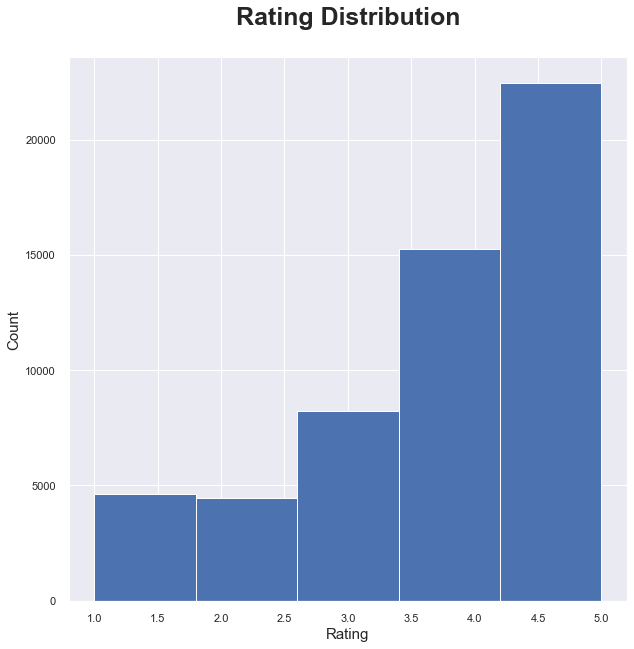

In [26]:
plt.figure(figsize=(10,10))

plt.hist(df['rating'], 5, density = False, 
         histtype ='bar')

plt.xlabel('Rating', fontdict = {'fontsize' : 15})
plt.ylabel('Count', fontdict = {'fontsize' : 15})
 
plt.title('Rating Distribution\n',
          fontweight ="bold", fontdict = {'fontsize' : 25})
  
plt.show()

<h2> Average Ratings by Hotels </h2>

We first group the dataframe by hotels and then show the average ratings and number of reviews per rating

In [27]:
hotel_avg_ratings = df.groupby('name').agg({'rating' : np.mean,'text' : np.size})
hotel_avg_ratings = hotel_avg_ratings.rename(columns = {'text': 'num_ratings'}, inplace = False)
hotel_avg_ratings

,rating,num_ratings
name,,
11th Avenue Hotel Hostel,1.000000,1
1785 Inn,2.875000,16
1900 House,4.642857,14
1906 Lodge At Coronado Beach,5.000000,1
21c Museum Hotel Lexington,2.500000,2
...,...,...
Ye Olde Danish Inn,5.000000,1
Z Bar Motel,4.000000,2
dana hotel and spa,4.482609,46


We can look into the average rating distribution

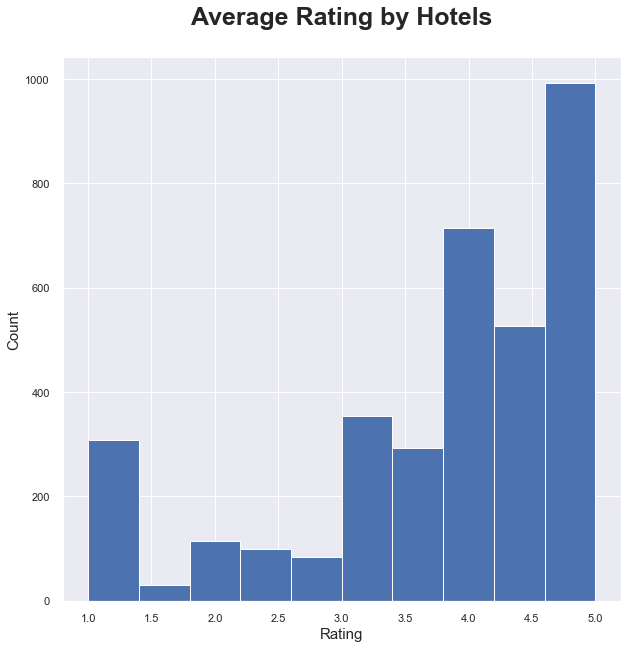

In [28]:
plt.figure(figsize=(10,10))

plt.hist(hotel_avg_ratings['rating'], density = False, 
         histtype ='bar')

plt.xlabel('Rating', fontdict = {'fontsize' : 15})
plt.ylabel('Count', fontdict = {'fontsize' : 15})
 
plt.title('Average Rating by Hotels\n',
          fontweight ="bold", fontdict = {'fontsize' : 25})
  
plt.show()

We want to sort the dataframe by average rating, so that we can show the five hotels with highest ratings and five hotels with lowest ratings

In [29]:
hotel_avg_ratings.nlargest(5, 'rating')

,rating,num_ratings
name,,
1906 Lodge At Coronado Beach,5.0,1
250 Main Hotel,5.0,2
AC Hotel Miami Beach,5.0,1
AC Hotel by Marriott Boston Downtown,5.0,1
Acadia Suites,5.0,2


In [30]:
hotel_avg_ratings.nsmallest(5, 'rating')

,rating,num_ratings
name,,
11th Avenue Hotel Hostel,1.0,1
A Swallow's Nest Motel,1.0,1
Admiral's Ocean Inn,1.0,2
Adria Motor Inn,1.0,1
Advance Motel,1.0,1


We see that the five hotels with lowest ratings all have ratings of 0.0 and the five hotels with highest ratings all have ratings of 5.0. 
<p>We also see that all these hotels with "lowest" and "highest" ratings only have 1 rating. 
<p>We investigate this further

In [31]:
print("Number of hotels with more than 1 rating:", hotel_avg_ratings[hotel_avg_ratings['num_ratings'] >1].shape[0])
print("Number of hotels with more than 2 ratings:", hotel_avg_ratings[hotel_avg_ratings['num_ratings'] >2].shape[0])


Number of hotels with more than 1 rating: 2305
Number of hotels with more than 2 ratings: 1768


In [32]:
print("Number of hotels with 1 rating:", hotel_avg_ratings[hotel_avg_ratings['num_ratings'] ==1].shape[0])
print("Number of hotels with less than 2 ratings:", hotel_avg_ratings[hotel_avg_ratings['num_ratings'] <= 2].shape[0])

Number of hotels with 1 rating: 1212
Number of hotels with less than 2 ratings: 1749


In [33]:
print("Number of hotels with more than 5 ratings:", hotel_avg_ratings[hotel_avg_ratings['num_ratings'] >5].shape[0])

Number of hotels with more than 5 ratings: 1158


If we were to only consider hotels with at least 5 ratings, the top and bottom hotels are as followed:

In [34]:
hotel_avg_ratings[hotel_avg_ratings['num_ratings'] > 5].nlargest(5, 'rating')

,rating,num_ratings
name,,
Aloft Philadelphia Downtown,5.0,16
Arrowhead Motel and Rv Park,5.0,11
Bardessono,5.0,8
Chocolate Turtle Bed and Breakfast,5.0,15
Cougar Crest Lodge,5.0,10


In [35]:
hotel_avg_ratings[hotel_avg_ratings['num_ratings'] > 5].nsmallest(5, 'rating')

,rating,num_ratings
name,,
The Litchfield Inn,1.000000,13
Norwood Inn and Suites,1.446154,65
Fiesta Inn and Suites,1.454212,546
Seattle Pacific Hotel,1.461538,13
Deluxe Inn Merrillville,1.571429,7


<AxesSubplot:>

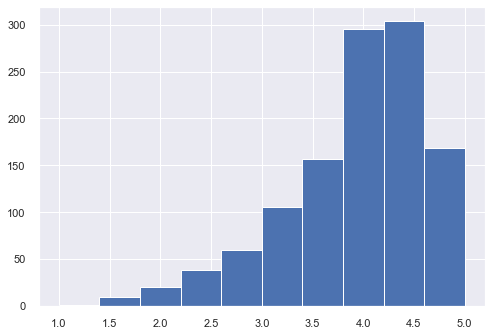

In [145]:
hotel_avg_ratings[hotel_avg_ratings['num_ratings'] > 5]['rating'].hist()

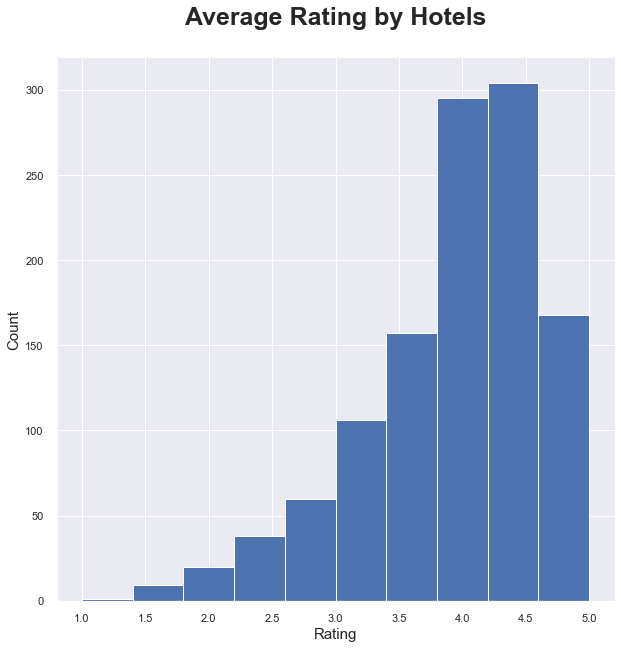

In [36]:
plt.figure(figsize=(10,10))

plt.hist(hotel_avg_ratings[hotel_avg_ratings['num_ratings'] > 5]['rating'], density = False, 
         histtype ='bar')

plt.xlabel('Rating', fontdict = {'fontsize' : 15})
plt.ylabel('Count', fontdict = {'fontsize' : 15})
 
plt.title('Average Rating by Hotels\n',
          fontweight ="bold", fontdict = {'fontsize' : 25})
  
plt.show()

<h2> Hotel Categories </h2>

We start by counting the frequency of hotels categories

In [37]:
hotel_categories= df['categories'].str.split(",").explode()
hotel_categories.value_counts()

Hotels                   46819
Hotel                    27094
Lodging                  11168
Hotels Motels             8257
Hotels and motels         6846
                         ...  
Surgeons                     1
Hotel Fashion Square         1
 Motel                       1
Real Estate                  1
Moultonborough Hotels        1
Name: categories, Length: 572, dtype: int64

However, we see that some categories clearly overlap (e.g., Hotels and hotel). Thus, we perform some text cleaning to collapse them. In particular, we lowercase and tokenize the category, remove stopwords, and convert each token to its base form via lemmatization. 
<p>In addition, to remove special symbols such as &, we only consider categories that have at least two characters

In [38]:
from nltk.stem.wordnet import WordNetLemmatizer 

nltk.download("stopwords", quiet = True)
lemmatizer = WordNetLemmatizer()
english_stopwords = set(nltk.corpus.stopwords.words('english'))

def clean_category(text):
    return [
        lemmatizer.lemmatize(token)
        for token in nltk.word_tokenize(text.lower())
        if token not in english_stopwords and len(token) > 1
    ]

hotel_categories = hotel_categories.apply(clean_category).explode()

Plotting the top ten categories

<AxesSubplot:>

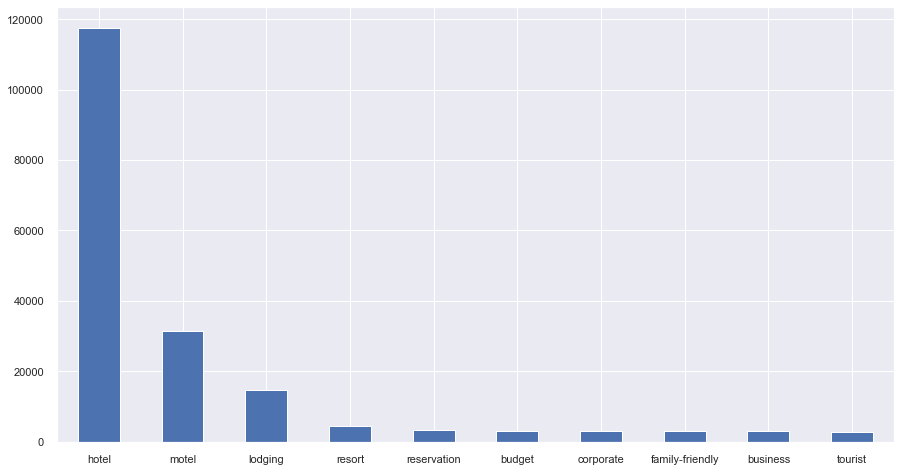

In [39]:
hotel_categories.value_counts().nlargest(10).plot(kind = "bar", rot = 0, figsize = (15, 8))

Showing the 10 most common hotel categories, we see that after hotel, motel and lodging on one hand and resort on another hand are also quite popular

In [40]:
hotel_categories.value_counts().nlargest(10)

hotel              117620
motel               31484
lodging             14834
resort               4338
reservation          3280
budget               3193
corporate            3187
family-friendly      3151
business             3024
tourist              2664
Name: categories, dtype: int64

<h2> Analysing Reviews</h2>

<h3> Data Filtering, Exclusions, and Segmentation Analysis </h3>

In [41]:
df_int = df.copy()
df_int.rating = df_int.rating.astype(int)

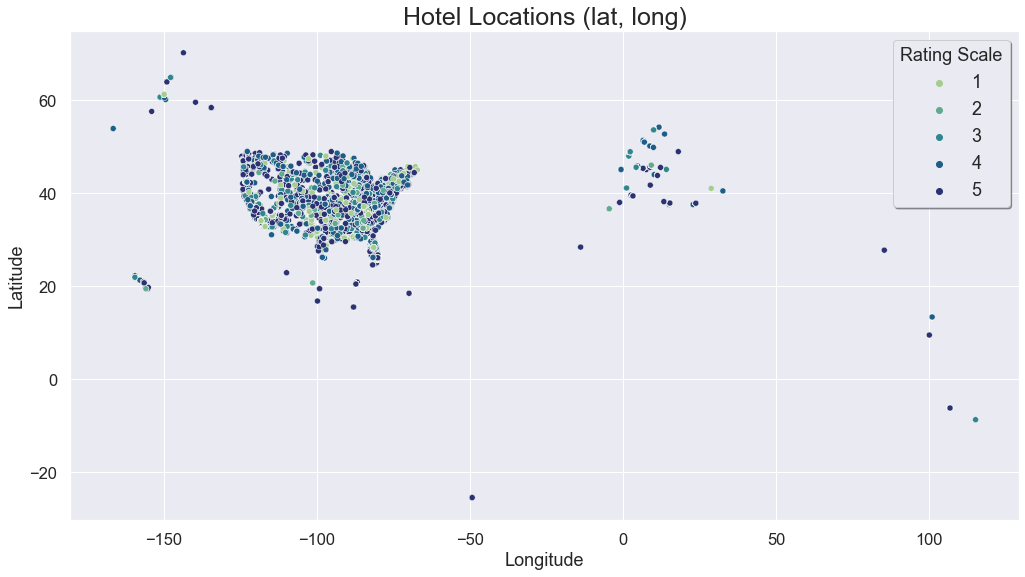

In [42]:
%matplotlib inline
#import matplotlib.pyplot as plt
#import seaborn as sns
plt.style.use('seaborn')

sns.set(rc={"figure.figsize":(17, 9)}, font_scale=1.5) 
p=sns.scatterplot(data=df_int, x='longitude', y='latitude', hue='rating',
                markers='.', legend='full',palette='crest')

p.set_title('Hotel Locations (lat, long)', fontsize = 25)
p.set_xlabel("Longitude", fontsize = 18)
p.set_ylabel("Latitude", fontsize = 18)
plt.legend(fontsize='medium', title='Rating Scale', shadow='True', frameon='True')

In [153]:
# import json
# import geojsonio
# import folium

# # convert Full Address, Latitude and Longitude dataframe columns to list
# df_coord = df[['name', 'latitude', 'longitude']]

# df_coord.drop_duplicates(inplace = True)

# df_coord.dropna(subset = ['latitude', 'longitude'], inplace = True)

# long_list = list(df_coord["longitude"])
# lat_list = list(df_coord["latitude"])
# name_list = list(df_coord['name'])


# # create folium map object
# geocoded_map = folium.Map(location=[40, -95], zoom_start=4) # location=[Lat, Long]

# for long, lat in zip(long_list, lat_list):
#     #geocoded_map.add_child(folium.Marker(location=[lat, long])
#     #geocoded_map.add_child(folium.CircleMarker(location=[lat, long], radius=5, color='green', fill_color='green', fill_opacity=.2))
    
#     #folium.Marker([lat, long], popup = name).add_to(geocoded_map)
#     folium.Marker([lat, long]).add_to(geocoded_map)
             
# geocoded_map

Most of the reviews appear to be for hotels in the U.S.. 
<p>We also see that the ratings appear to be evenly distributed with respect to location.

In [43]:
df.country.unique()

array(['US'], dtype=object)

Despite the plot showing that there are reviews outside of the U.S., the country column indicates that all reviews are in the U.S.. It's not clear if this will have any impact on model performance.

In [44]:
df_US = df[((df['latitude']<=50.0) & (df['latitude']>=24.0)) & 
         ((df['longitude']<=-65.0) & (df['longitude']>=-122.0))]

In [45]:
print('There are',len(df) - len(df_US),'reviews outside the U.S.')
print('This is {0:1.2f}%'.format(((len(df) - len(df_US))/ len(df))*100), 'of all reviews')

There are 8093 reviews outside the U.S.
This is 14.71% of all reviews


Filtering out all locations outside of the U.S.

In [46]:
df = df[((df['latitude']<=50.0) & (df['latitude']>=24.0)) & 
         ((df['longitude']<=-65.0) & (df['longitude']>=-122.0))]

In [47]:
df_new = df.copy()
df_new.rating = df_new.rating.astype(int)

Plot another scatter plot, but on the truncated dataset (constrained to only those hotel reviews within the U.S.).

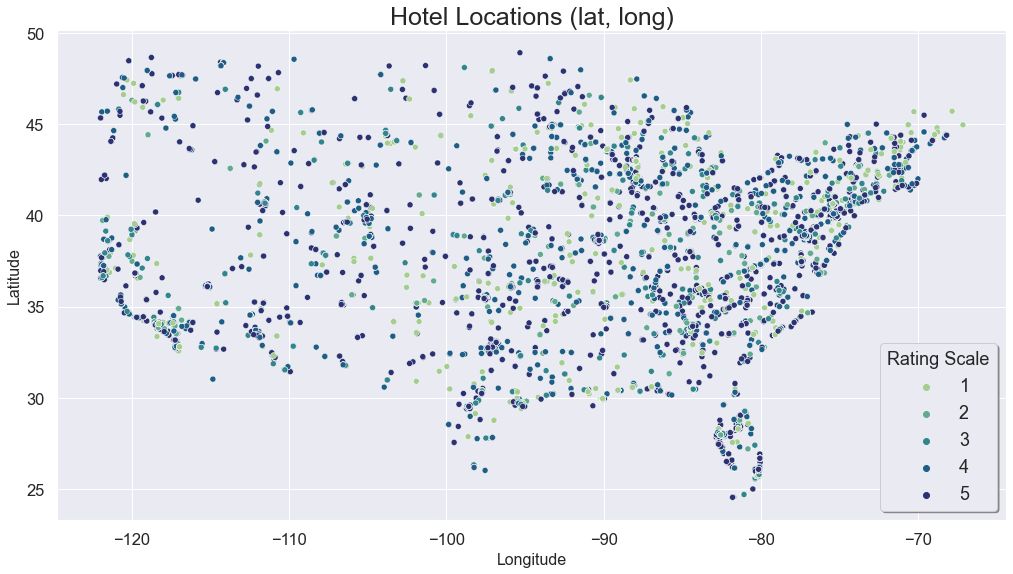

In [48]:
sns.set(rc={"figure.figsize":(17, 9)}, font_scale=1.5) 
p=sns.scatterplot(data=df_new, x='longitude', y='latitude', hue='rating',
                markers='.', legend='full',palette='crest')

p.set_title('Hotel Locations (lat, long)', fontsize = 25)
p.set_xlabel("Longitude", fontsize = 16)
p.set_ylabel("Latitude", fontsize = 16)
plt.legend(fontsize='medium', title='Rating Scale', shadow='True', frameon='True')

In [50]:
import geocoder

def get_state(df):
    g = geocoder.osm([df.latitude, df.longitude], method = 'reverse').json
    if g:
        try:
            state = g.get('state')
            #zip_code = g.get('postcode')
        except:
            pass
        return state
    else:
        return 'no state'

def get_zip(df):
    g = geocoder.osm([df.latitude, df.longitude], method = 'reverse').json
    if g:
        try:
            #state = g.get('state')
            zip_code = g.get('postal')
        except:
            pass
        return zip_code
    else:
        return 'no zip_code'

In [51]:
df_coord = df[['name', 'latitude', 'longitude']]

df_coord.drop_duplicates(inplace = True)

df_coord.dropna(subset = ['latitude', 'longitude'], inplace = True)
df_coord

,name,latitude,longitude
57,Americas Best Value Inn,40.689730,-95.788826
58,Intermezzo,34.664684,-120.115036
59,Studio 6,28.793795,-97.849655
60,Little Paradise Hotel,33.802822,-116.542690
81,Comfort Suites,29.681085,-95.402996
...,...,...,...
55903,Six South St Hotel,43.700150,-72.288860
55905,SpringHill Suites Boise,43.662285,-116.335304
55908,Sandy Neck Motel,41.729390,-70.399250
55909,Shilo Inn Suites - Coeur d'Alene,47.699930,-116.796900


In [54]:
all_state = df_coord[['latitude', 'longitude']].apply(get_state, axis = 1)
all_state

In [ ]:
all_zip = df_coord[['latitude', 'longitude']].apply(get_zip, axis = 1)
all_zip

In [222]:
df_coord['state'] = all_state
df_coord['zip_code'] = all_zip
df_coord

,name,latitude,longitude,state,zip_code
60,Little Paradise Hotel,33.802822,-116.542690,California,92264
81,Comfort Suites,29.681085,-95.402996,Texas,77054
96,Thunderbird Executive Inn and Conference Center,33.620773,-112.185661,Arizona,85306
98,Little Belt Inn Neihart,46.933598,-110.735886,Montana,59465
99,Hawthorn Suites By Wyndham Livermore Wine Country,37.698349,-121.773710,California,94551
...,...,...,...,...,...
55903,Six South St Hotel,43.700150,-72.288860,New Hampshire,03755
55905,SpringHill Suites Boise,43.662285,-116.335304,Idaho,83713
55908,Sandy Neck Motel,41.729390,-70.399250,Massachusetts,02763
55909,Shilo Inn Suites - Coeur d'Alene,47.699930,-116.796900,Idaho,83814


<h3> Reviews categories by ratings </h3>

In [55]:
rating_categories = ["Very bad", "Moderately bad", "Neutral", "Moderately good", "Very good"]
df['rating_category'] = df['rating'].apply(lambda r: rating_categories[int(r) - 1])

Text(0, 0.5, 'Count')

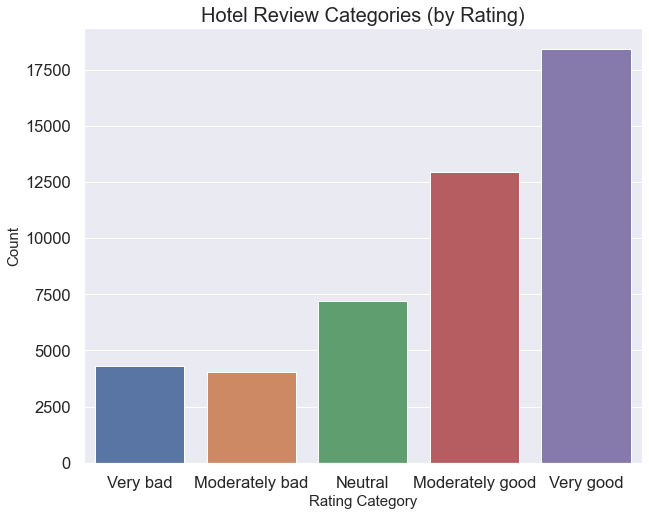

In [56]:
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 8]
sns.countplot(df.rating_category, order = rating_categories)
plt.title("Hotel Review Categories (by Rating)", fontsize = 20)
plt.xlabel("Rating Category", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

<h3> Review dates </h3>

Presumably people would write their review to a hotel shortly after their stay, so looking at the review count at a particular time would provide some insights into a hotel's traffic at that time.

In [57]:
df['month'] = pd.to_datetime(df['date']).dt.month

In [58]:
df.groupby('month').size()

month
1.0     2745
2.0     2769
3.0     3477
4.0     3817
5.0     4292
6.0     4912
7.0     6133
8.0     5223
9.0     4110
10.0    4069
11.0    2625
12.0    2530
dtype: int64

Text(0, 0.5, 'Count')

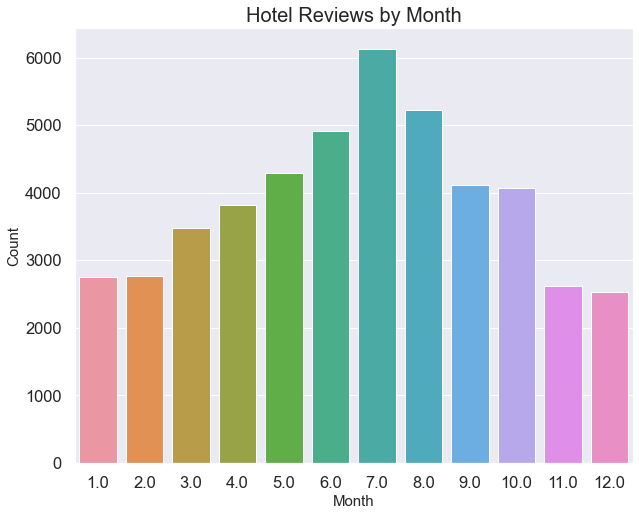

In [59]:
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 8]
sns.countplot(df.month)
plt.title("Hotel Reviews by Month", fontsize = 20)
plt.xlabel("Month", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

---------We see that the three clear modes are in January, July, and December. These three months correspond to the New Year holiday, summer holiday, and Christmas, so it makes sense that they yielded the highest number of guests and reviews.--------

We see summer holodays yield the highest number of guests and reviews.

In [165]:
#NEED TO GET FOR EACH MONTH THE MAXI NO OF REVIEWS CAME FROM WHICH CATEGORY

<h3> Distribution of ratings by month </h3>

Trying to see if the ratings tend to be higher at certain times of the year than at other times

In [60]:
month_rating_grouped = df.groupby(['month', 'rating'])
month_rating_grouped.size().unstack()

rating,1.00,1.25,1.30,1.45,1.50,1.65,1.90,2.00,2.10,2.30,...,4.20,4.25,4.30,4.40,4.50,4.60,4.70,4.80,4.90,5.00
month,,,,,,,,,,,,,,,,,,,,,
1.0,169.0,NaN,NaN,NaN,5.0,1.0,NaN,179.0,NaN,2.0,...,9.0,1.0,16.0,8.0,5.0,11.0,NaN,16.0,1.0,1175.0
2.0,209.0,NaN,NaN,1.0,5.0,NaN,NaN,181.0,1.0,1.0,...,1.0,NaN,3.0,10.0,NaN,8.0,NaN,13.0,NaN,1163.0
3.0,309.0,1.0,NaN,NaN,3.0,1.0,NaN,242.0,3.0,NaN,...,3.0,NaN,1.0,7.0,4.0,16.0,NaN,21.0,NaN,1440.0
4.0,309.0,NaN,1.0,1.0,3.0,2.0,NaN,304.0,NaN,NaN,...,NaN,NaN,NaN,10.0,NaN,9.0,NaN,13.0,2.0,1572.0
5.0,336.0,NaN,NaN,2.0,1.0,1.0,NaN,313.0,3.0,1.0,...,NaN,NaN,NaN,11.0,NaN,16.0,NaN,13.0,2.0,1704.0
6.0,481.0,1.0,NaN,3.0,5.0,NaN,NaN,388.0,NaN,3.0,...,NaN,NaN,NaN,14.0,1.0,9.0,1.0,21.0,NaN,1875.0
7.0,621.0,NaN,NaN,NaN,9.0,NaN,2.0,549.0,2.0,1.0,...,NaN,NaN,NaN,14.0,NaN,20.0,1.0,20.0,NaN,2235.0
8.0,502.0,NaN,NaN,NaN,9.0,NaN,1.0,480.0,1.0,1.0,...,1.0,1.0,NaN,10.0,NaN,31.0,1.0,30.0,1.0,1896.0
9.0,370.0,NaN,NaN,NaN,2.0,1.0,NaN,345.0,NaN,2.0,...,NaN,NaN,NaN,6.0,1.0,13.0,NaN,17.0,NaN,1639.0


It is a bit hard to see the distribution this way, so we can classify the ratings into groups

In [61]:
month_rating_cat_grouped = df.groupby(['month', 'rating_category'])
month_rating_df = month_rating_cat_grouped.size().unstack()[rating_categories]
month_rating_df

rating_category,Very bad,Moderately bad,Neutral,Moderately good,Very good
month,,,,,
1.0,175,192,393,810,1175
2.0,215,227,390,774,1163
3.0,314,266,498,959,1440
4.0,316,328,527,1074,1572
5.0,340,327,688,1233,1704
6.0,490,404,760,1383,1875
7.0,632,579,1033,1654,2235
8.0,512,512,852,1451,1896
9.0,373,367,632,1099,1639


<AxesSubplot:xlabel='month'>

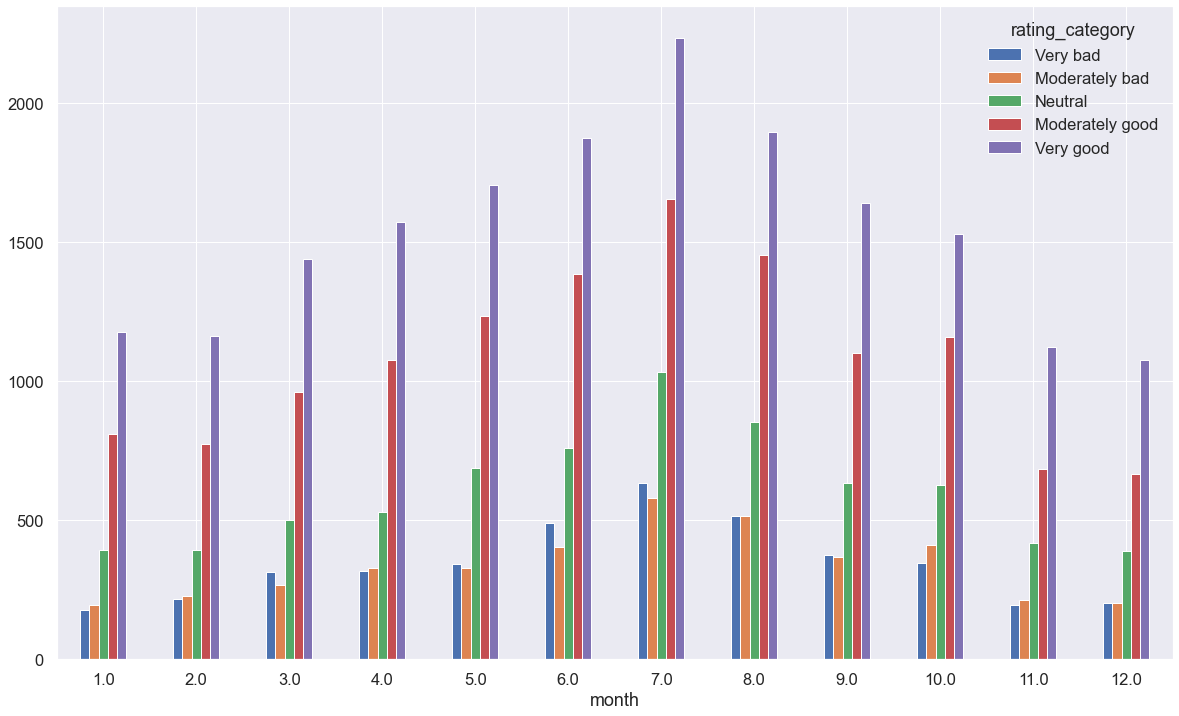

In [62]:
month_rating_df.plot(kind = 'bar', rot = 0, figsize = (20,12))

In [169]:
#NEED TO TAKE A CLOSER LOOK
#Why are there less ratingsa in January & Dec, these are high seasons

----------As we expected from the rating distribution earlier, most reviews are relatively position. Additionally, we can see that even though January, July, and December have the most reviews, July is the month with the most positive reviews. Perhaps this means in the summer, people tend to leave better reviews than other seasons.--------

<h3> Reviews Wordclouds</h3>

Before we start analysis lets take a closer look in to the reviews

In [66]:
df[df['title'] == ''][['title','text']]

,title,text
57,,to share your opinion of this businesswith YP ...
58,,to share your opinion of this businesswith YP ...
59,,to share your opinion of this businesswith YP ...
97,,to share your opinion of this businesswith YP ...
98,,xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
...,...,...
35743,,to share your opinion of this businesswith YP ...
35910,,to share your opinion of this businesswith YP ...
35911,,xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
40680,,Staffs and service were excellent. I will defi...


In [67]:
df.loc[57]['text']

'to share your opinion of this businesswith YP visitors across the United Statesand in your neighborhood'

In [68]:
df_noreviews = df[df['text']=='to share your opinion of this businesswith YP visitors across the United Statesand in your neighborhood']['text']
len(df_noreviews)

178

Removing the rows with review place holders

In [69]:
df = df[df['text']!='to share your opinion of this businesswith YP visitors across the United Statesand in your neighborhood']
df[df['title'] == ''][['title','text']]

,title,text
98,,xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
184,,Came to Binghamton to visit with a relative. F...
185,,Great Experience. Nice Staff clean rooms good ...
247,,xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
885,,The motel was clean and comfortable bed and a ...
...,...,...
35419,,xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
35592,,It was pleasant and near to my family who we w...
35911,,xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
40680,,Staffs and service were excellent. I will defi...


<h4>Cleaning the reviews - Language</h4>

Converting reviews with foreign language

In [70]:
#!pip install langdetect
#!pip install deep-translator
from langdetect import detect
from deep_translator import GoogleTranslator

In [71]:
df['review'] = df['title'] + ' ' + df['text']
df = df[df.review.apply(lambda x: len(str(x)) > 12)]

def review_transform(t):
    temp = t.encode('ascii', 'ignore').decode('utf-8').strip() #transform unrecognized text      
    if len(temp) > 12 and any(c.isalpha() for c in temp): #min length of review is 12, must contain character
        if detect(temp) != 'en':
            temp = GoogleTranslator(source='auto', target='en').translate(temp)
            
    return temp
#Beware this takes some time to run    
df['review'] = df['review'].apply(lambda t: review_transform(t))
df = df[df['review'].apply(lambda x: len(x) > 12)]

Initial Wordcloud Visualization

In [72]:
def get_reviews(review_list):

    text=''
    for rev in review_list:
        text += rev
    return text

text = get_reviews(df['review'])

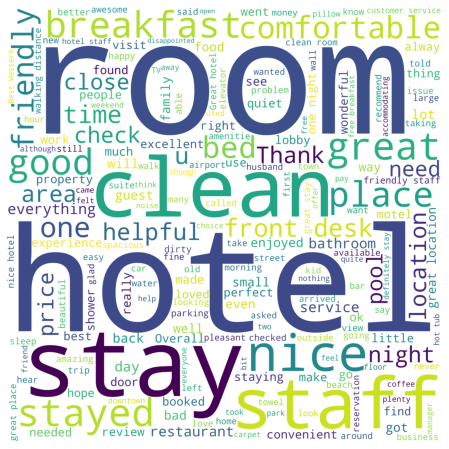

In [73]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white',width = 3000,height = 3000).generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

We see that the most common words are actually "hotel", "room", and "stay", which makes sense, but does not give us much insights. Thus, we remove these three words and build the word cloud again. Additionally, we want to exclude "I" and "s" which would appear quite often in reviews

In [74]:
def remove_words(text_string, DELETE_WORDS = []):
    text_string = text_string.lower()
    for word in DELETE_WORDS:
        if len(word) == 1: 
            text_string = text_string.replace(' ' + word + ' ',' ')
        else:
            text_string = text_string.replace(word,' ')
    return text_string

def remove_short_words(text_string, min_length = 0):
    word_list = text_string.split()
    for word in word_list:
        if len(word) < min_length:
            text_string = text_string.replace(' ' + word + ' ',' ')
    return text_string

def clean_text(all_reviews):
    text = ''
    for rev in all_reviews:
        text += rev
    text = remove_words(text, ['hotel', 'room', 'stay', 'I', 's', 'ed', 'u', 'b'])
    text = remove_short_words(text, 2)
    return text

Clean reviews

In [75]:
df['review'] = df['review'].apply(lambda x: clean_text(x))

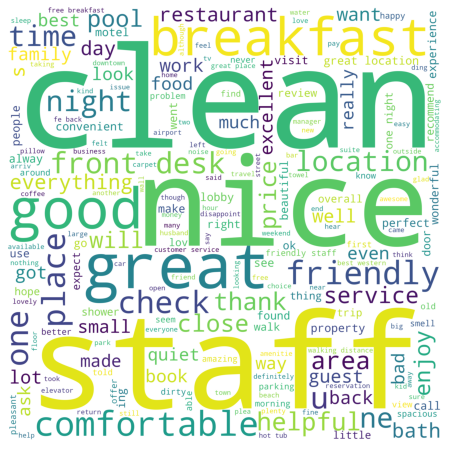

In [76]:
#text = clean_text(df['review'])
text = get_reviews(df['review'])
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white',width = 3000,height = 3000).generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

From this we see that many reviews mention "clean" and "staff", suggesting that cleanliness and hotel staffs are something that customers care about.

We also see some mentions of "breakfast", "location", "front desk", etc. These are also some features that customer pay attention to.

Would the word clouds be any different for the very good reviews (rating 5.0) and the very bad reviews (rating 1.0)?

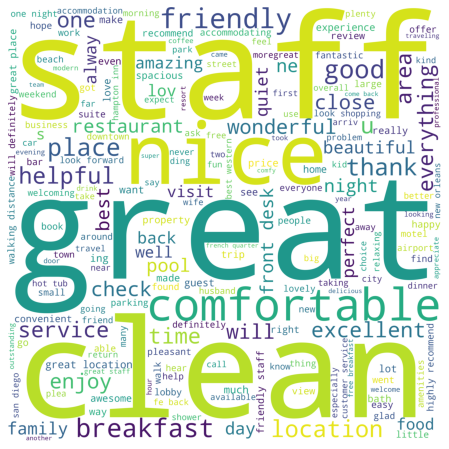

In [77]:
good_reviews = df[df['rating'] == 5.0]['review']

#good_text = clean_text(good_reviews)
good_text = get_reviews(good_reviews)
    
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white',width = 3000,height = 3000).generate(good_text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

We can see that the good reviews mention a lot of "clean" and "staff", other than the obvious "great". There are also a lot of mentions of "friendly", "helpful", "comfortable", "convenient", "location", which all hint that the good hotels are the one that are clean and comfortable, with friendly and helpful staff, and at a convenient location.

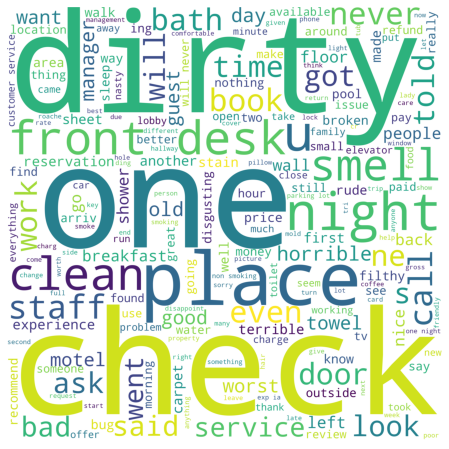

In [78]:
bad_reviews = df[df['rating'] == 1.0]['review']

#bad_text = clean_text(bad_reviews)
bad_text = get_reviews(bad_reviews)

wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white',width = 3000,height = 3000).generate(bad_text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

On the other hand, the bad reviews are the one about hotels that are "dirty","horrible", "time","booked", or even "smelled".

We can verify these by looking at specific reviews for top hotels and bottom hotels.

<h3> Considering reviews for top hotels and bottom hotels </h3>

To ensure we have enough reviews to generate wordclouds, we consider the 4 best and worst hotels where each hotel has at least 5 reviews

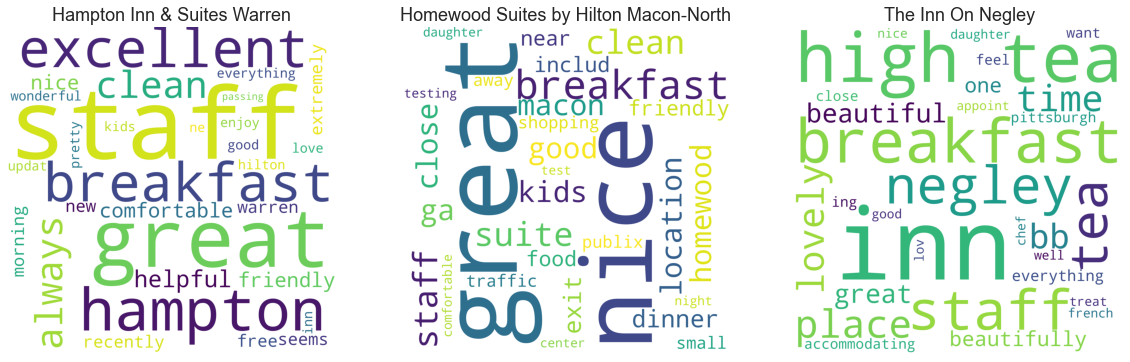

In [79]:
top_hotels_avg_rating = hotel_avg_ratings[hotel_avg_ratings['num_ratings'] > 5].sort_values(by = 'rating', ascending = False).head(3)
top_hotels_avg_rating.reset_index(level=0, inplace=True)
#top_hotels = df[df['name'].isin(top_hotels_avg_rating['name'])]

top_hotels = []

for hotel_name in top_hotels_avg_rating['name']:
    hotel_reviews = df[df['name'] == hotel_name]['review']
    hotel_text = clean_text(hotel_reviews)
    top_hotels.append((hotel_name, hotel_text))
    
#Set up side by side clouds
COL_NUM = 3
ROW_NUM = 1
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(20,20))

for i in range(0,len(top_hotels)):
    text_string = top_hotels[i][1]
    
    #ax = axes[i//2, i%2] 
    ax = axes[i] 
    ax.set_title(top_hotels[i][0])
    wordcloud = WordCloud(stopwords = STOPWORDS,background_color='white',width=2000, height=2000,max_words=30).generate(text_string)
    ax.imshow(wordcloud)
    ax.axis('off')
    
plt.show()

In [81]:
bottom_hotels_avg_rating = hotel_avg_ratings[hotel_avg_ratings['num_ratings'] > 5].sort_values(by = 'rating')
bottom_hotels_avg_rating.reset_index(level=0, inplace=True)
bottom_hotels_avg_rating

,name,rating,num_ratings
0,The Litchfield Inn,1.000000,13
1,Norwood Inn and Suites,1.446154,65
2,Fiesta Inn and Suites,1.454212,546
3,Seattle Pacific Hotel,1.461538,13
4,Deluxe Inn Merrillville,1.571429,7
...,...,...,...
1153,Cougar Crest Lodge,5.000000,10
1154,Hilton Garden Inn Ithaca,5.000000,7
1155,Hampton Inn Suites PortlandVancouver,5.000000,6
1156,Home2 Suites by Hilton Tallahassee State Capitol,5.000000,10


In [82]:
df[df['name'] == 'The Litchfield Inn']['text']

9446    stay in the ocean front rooms in the upper tow...
9447    great location, beautiful beach, rooms are all...
9448                             great beach, clean rooms
9449    looking for a retreat location? the oceanfront...
9450    been staying here for years.  enjoy 2nd floor ...
9451    Great location, Beautiful beach, rooms are all...
9452    Been staying here for years.  Enjoy 2nd floor ...
9455    Stay in the ocean front rooms in the upper tow...
9456                             Great beach, clean rooms
9457    Looking for a retreat location? The Oceanfront...
Name: text, dtype: object

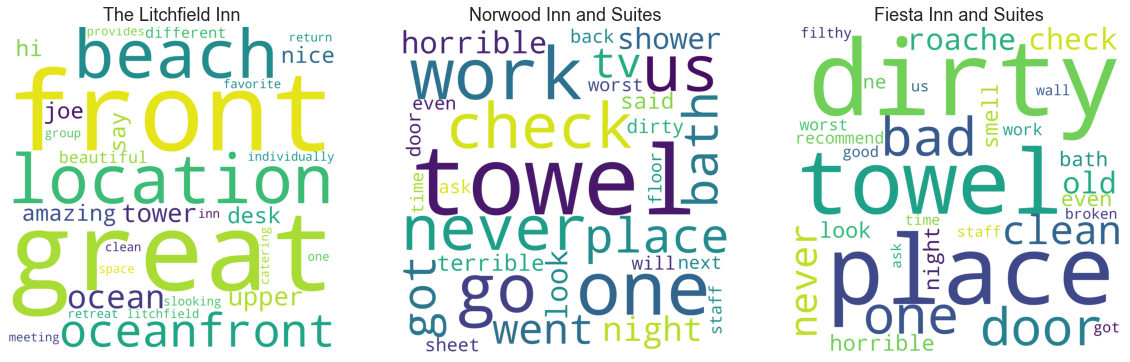

In [84]:
bottom_hotels_avg_rating = hotel_avg_ratings[hotel_avg_ratings['num_ratings'] > 5].sort_values(by = 'rating').head(3)
bottom_hotels_avg_rating.reset_index(level=0, inplace=True)
#bottom_hotels = df[df['name'].isin(bottom_hotels_avg_rating['name'])]

bottom_hotels = []

for hotel_name in bottom_hotels_avg_rating['name']:
    hotel_reviews = df[df['name'] == hotel_name]['review']
    hotel_text = clean_text(hotel_reviews)
    
    bottom_hotels.append((hotel_name, hotel_text))
    
#Set up side by side clouds
COL_NUM = 3
ROW_NUM = 1
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(20,20))

for i in range(0,len(bottom_hotels)):
    text_string = bottom_hotels[i][1]
    
    ax = axes[i] 
    ax.set_title(bottom_hotels[i][0])
    wordcloud = WordCloud(stopwords = STOPWORDS,background_color='white',width=2000,height=2000,max_words=30).generate(text_string)
    ax.imshow(wordcloud)
    ax.axis('off')
    
plt.show()

<h3>Review summarzation</h3>

In [85]:
reviews = dict()
for i in range(len(df)):
    if df['name'].iloc[i] in reviews:
        reviews[df['name'].iloc[i]] = reviews[df['name'].iloc[i]] + str(df['review'].iloc[i])
    else: 
        reviews[df['name'].iloc[i]] = str(df['review'].iloc[i])

In [86]:
def get_summarization(hotel_name, reviews = reviews):
    
    text = reviews[hotel_name]
    striptext = text.replace('\n\n', ' ')
    striptext = striptext.replace('\n', ' ')
    
    return gensim.summarization.summarize(striptext, word_count=100)


def draw_wordcloud(summary):
    
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=3000,height=3000).generate(summary)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
    return None

Looking at one of the hotels with low rating

In [87]:
summary = get_summarization('Fiesta Inn and Suites')
print(summary)

and the top of it was death ticks and bugs under mattressthey show  me  and all the same resultsnastyvery bad   the   was in terrible condition the pillows had hair as well as the sheets did not have to ask for towels and soaps because we did not want to bathe because of how dirty all the corridors and stairs were going down and up some very bad looking people in in general, would like that  s.com does not put it in their   catalog because in the photos things appear very different from realitynot what expect  the motel is very old and run down.


In [88]:
summary = get_summarization('The Litchfield Inn')
print(summary)

the oceanfront litchfield inn provides meeting space, catering, group accommodation rates, bus parking and an oceanfront setting with easy access to the grand strand.been  ing here for years.
enjoy 2nd floor "dunes"  especially in fall and spring.great location, beautiful beach,  are all different since they are individually own  so you can get favorite and return to the same one!been  ing here for years.
the oceanfront litchfield inn provides meeting space, catering, group accommodation rates, bus parking and an oceanfront setting with easy access to the grand strand.


Looking at on of the hotels with great ratings

In [89]:
summary = get_summarization('The Inn On Negley')
print(summary)

the chef at the inn is extremely talent  everything for the tea was delicious (especially the scones), as was breakfast the next morning.
morelove their high tea have never actually    at the inn but have tour  many of the  and they are appoint  beautifully.
hot breakfast was excellent and hosts very friendly.great inn close to downtown french toast is amazing.a wonderful and relaxing   only    one night, but check  in at 1:00 pm and left at 11:00 the next day so it wasn't just in to sleep and out again.
as is the cheese plate.holiday in pittsburgh we are  ing at the inn on negley for the fourth time.


the staff is extremely friendly and there's free breakfast in the morning.
the staff is friendly, welcoming and helpful.
the breakfast is excellent and coffee,tea and bottl  water are always available.love hampton love  ing at hampton always nice and clean!kids enjoy  the pool free breakfast was great and staff was so nice highly recommend it to anyone always look for hampton first when we ne    they are reliable for there politeness and cleanslinessfamily trip excellent clean   and friendly staff.
wonderful s, very helpful staff and great breakfast.great  the staff welcom  me as the guest of the day!
the breakfast was good and the   is pretty updat the  was surprisingly super comfortable.


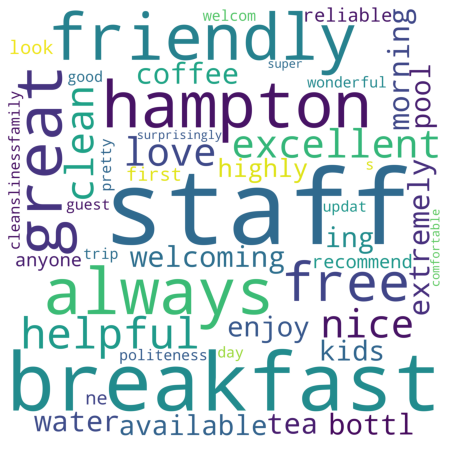

In [90]:
summary = get_summarization('Hampton Inn & Suites Warren')
print(summary)
draw_wordcloud(summary)

For any hotel in the list one can quickly get an undrstanding of what to expect from past customers experiences

the reason we chose to   at 40 berkeley was for the convenient location (2 blocks from the orange subway line and 30 minute walk to the boston common/downtown area) and reasonable price compar  to other  and hostels in boston (130/night for   with double  and shar  bath ).
moregreat location but very basic very nice place!good location, way overpric  we arriv  at 40 berkeley in the middle of october for one night  we had seen it advertis  on hostelworld as trendy hostel in trendy area and given the 138 price tag for shar  bath   were expecting more.


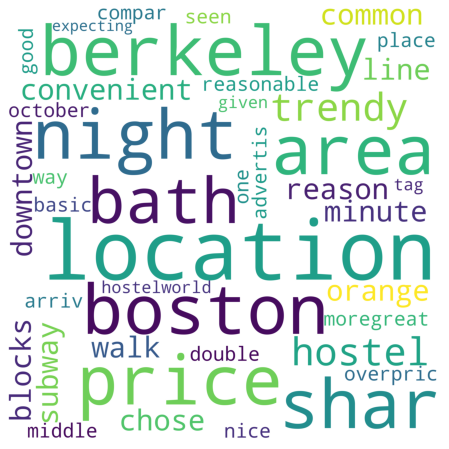

In [91]:
summary = get_summarization('40 Berkeley Hostel')
print(summary)
draw_wordcloud(summary)

<h2>Analysis Customers </h2>

<h3>Segmentation of customer based on reviews using LDA: Latent Dirichlet Allocation Model</h3>

<li>Import all necessary libraries
<li>Review document preparation
<li>Cleaning the data
<li>Building and running the model
<li>Result display and interpretation

<h4>Importing necessary libraries </h4>

In [92]:
import nltk
from nltk import sent_tokenize,word_tokenize 
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem.porter import PorterStemmer
import pprint

<h4>Data preparation and cleaning</h4>

In [93]:
review_list =list()
for review in df['review']: 
    review = clean_text(review)
    review_list.append(review)

In [94]:
for i in range(len(review_list)):
    review = review_list[i]
    sents = sent_tokenize(review)
    for j in range(len(sents)):
        sent = sents[j]
        sent = sent.strip().replace('\n','')
        sents[j] = sent
    review_list[i] = '. '.join(sents)

In [95]:
p_stemmer = PorterStemmer()
for review in review_list[:-1]:
    words = word_tokenize(review)
    review_list[i] =  nltk.Text([p_stemmer.stem(i).lower() for i in words])

In [96]:
no_list = ['la', 'en', 'y', 'et', 'le', 'que', 'el', 'e', 'und', 'es', 'stay', 'stayed','staying','san', 'est', 'muy', 'trs', 'les', 'die', 'las', 'il', 'das', 'para']
texts = [[word for word in review.lower().split()
        if word not in STOPWORDS and word.isalnum() and word not in no_list and not word.lower() == 'hotel']
        for review in review_list[:-1]]

<h4>Building and implementing the model</h4>

In [97]:
def lda_modeling(texts,num_topics=3,passes = 15):
    #Building a model
    dictionary = corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]
    
    #Implementing the model
    lda = LdaModel(corpus,
              id2word=dictionary,
              num_topics=num_topics,
              passes=passes)
    return lda,corpus,dictionary

In [98]:
lda,corpus,dictionary = lda_modeling(texts)

<h4>Results Interpretation</h4>

Candidate topics in the form of words

In [99]:
pp = pprint.PrettyPrinter(indent=5)
pp.pprint(lda.print_topics(num_words=20))

[    (    0,
          '0.026*"great" + 0.013*"location" + 0.009*"place" + 0.008*"perfect" '
          '+ 0.008*"locat" + 0.007*"walk" + 0.007*"walking" + 0.007*"enjoy" + '
          '0.007*"close" + 0.007*"right" + 0.007*"beautiful" + 0.006*"nice" + '
          '0.006*"new" + 0.006*"wonderful" + 0.006*"lov" + 0.006*"inn" + '
          '0.006*"time" + 0.006*"weekend" + 0.006*"view" + 0.006*"family"'),
     (    1,
          '0.011*"check" + 0.011*"bath" + 0.010*"desk" + 0.009*"like" + '
          '0.009*"ne" + 0.008*"night" + 0.007*"got" + 0.006*"book" + '
          '0.005*"ask" + 0.005*"door" + 0.005*"shower" + 0.005*"told" + '
          '0.005*"clean" + 0.005*"bad" + 0.005*"time" + 0.005*"smell" + '
          '0.005*"place" + 0.005*"floor" + 0.005*"water" + 0.004*"work"'),
     (    2,
          '0.033*"staff" + 0.032*"great" + 0.029*"breakfast" + 0.028*"nice" + '
          '0.028*"good" + 0.024*"clean" + 0.018*"friendly" + '
          '0.011*"comfortable" + 0.011*"location" + 0.010*

Wordcloud for the topics

In [100]:
def draw_wordcloud(lda,num_topics,min_size=0,STOPWORDS=[],max_words=30):
    
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    %matplotlib inline
    from random import shuffle
        
    COL_NUM = num_topics
    ROW_NUM = 1
    fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(20,20))

    
    for i in range(num_topics):
        word_list=[]
        prob_total = 0
        for word,prob in lda.show_topic(i,topn=50):
            prob_total +=prob
        for word,prob in lda.show_topic(i,topn=50):
            if word in STOPWORDS or  len(word) < min_size:
                continue
    #         freq = int(prob/prob_total*1000)
            freq = int(prob/prob_total*100)
            alist=[word]
            word_list.extend(alist*freq)
        
        shuffle(word_list)
        text = ' '.join(word_list)

        ax = axes[i] 
        ax.set_title(lda.show_topics()[i][0])
        wordcloud = WordCloud(stopwords = STOPWORDS,background_color='white',height = 2000, width = 2000,max_words=max_words).generate(text)
        ax.imshow(wordcloud)
        ax.axis('off') 
        
    return None

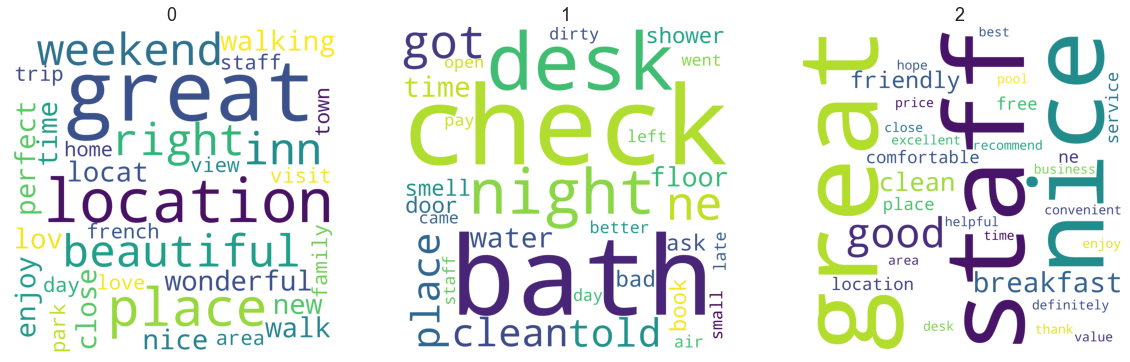

In [101]:
draw_wordcloud(lda, 3)

Intertopic Distance Map (via multidimensional scaling)

In [102]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
lda_display = gensimvis.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

There are three types of reviews showing interests in different areas

<li> Location : Views, beauty, scenes
<li> Service : Friendly, appreciation, time, experience
<li> Facilities: Rooms, cleanliness, breakfast

# Modeling

<h1> Predicting reviews rating from reviews text and title </h1>

<h2> Features Engineering using TD-IDF and Prepare training and testing datasets </h2>

In [93]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.3, random_state = 28)

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train['review'])
#X_train.A

In [95]:
y_train = train['rating']
#y_train

In [96]:
X_test = vectorizer.transform(test['review'])
y_test = test['rating']
#X_test.A

<h2> Predict using different models </h2>

In [97]:
def fit_reg_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
    
    model_r2 = r2_score(y_test, y_pred)
    model_mse = mean_squared_error(y_test, y_pred)
    model_evs = explained_variance_score(y_test, y_pred)
    
    return model_r2, model_mse, model_evs

<h3> Using Linear Regression </h3>

In [98]:
# from sklearn import linear_model

# lin_reg = linear_model.LinearRegression() # an empty model

In [99]:
# lin_r2, lin_mse, lin_evs = fit_model(lin_reg)

<h3> Using Decision Tree </h3>

In [100]:
# from sklearn.tree import DecisionTreeRegressor

# dct_reg = DecisionTreeRegressor(max_depth = 5)

In [101]:
# dct_r2, dct_mse, dct_evs = fit_model(dct_reg)

<h3> Using Random Forest </h3>

In [102]:
# from sklearn.ensemble import RandomForestRegressor

# rf_reg = RandomForestRegressor(max_depth = 5, random_state = 0)

In [103]:
# rf_r2, rf_mse, rf_evs = fit_model(rf_reg)

<h3> Using Nearest Neighbors </h3>

In [104]:
# from sklearn.neighbors import KNeighborsRegressor

# knn_reg = KNeighborsRegressor(n_neighbors = 2)

In [105]:
# knn_r2, knn_mse, knn_evs = fit_model(knn_reg)

<h3> Using Multi-layer Perceptron </h3>

In [106]:
# from sklearn.neural_network import MLPRegressor

# mlp_reg = MLPRegressor(random_state = 1, max_iter = 500)

In [107]:
# mlp_r2, mlp_mse, mlp_evs = fit_model(mlp_reg)

<h3> Using Support Vector Machines </h3>

In [108]:
# from sklearn.svm import LinearSVR

# svm_reg = LinearSVR()

In [109]:
# svm_r2, svm_mse, svm_evs = fit_model(svm_reg)

<h2> Compare Model Performance </h2>

In [110]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR


lin_reg = linear_model.LinearRegression() 
dct_reg = DecisionTreeRegressor(max_depth = 5)
rf_reg = RandomForestRegressor(max_depth = 5, random_state = 0)
knn_reg = KNeighborsRegressor(n_neighbors = 2)
mlp_reg = MLPRegressor(random_state = 1, max_iter = 500)
svm_reg = LinearSVR()

all_reg_models = [lin_reg, dct_reg, rf_reg, knn_reg, mlp_reg, svm_reg]
reg_models_perf = []

for model in all_reg_models:
    model_r2, model_mse, model_evs = fit_reg_model(model)
    reg_models_perf.append({'R-squared' : model_r2, 'Mean squared error' : model_mse, 'Explained variance score': model_evs})
    
reg_models_df = pd.DataFrame(reg_models_perf)
reg_models_df                    

,R-quared,Mean squared error,Explained variance score
0,-0.482189,2.438575,-0.482032
1,0.285970,1.174760,0.286032
2,0.308239,1.138122,0.308301
3,-0.790280,2.945463,0.165693
4,0.312164,1.131665,0.312384
5,0.571882,0.704362,0.575777


In [201]:
reg_models_df['Model'] = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 
                          'Nearest Neighbors Regressor', 'Multi-layer Perceptron', 'Support Vector Machine']
reg_models_df.rename(columns={'R-quared': 'R-squared'}, inplace = True)
reg_models_df.set_index('Model', inplace = True)
reg_models_df

,R-squared,Mean squared error,Explained variance score
Model,,,
Linear Regression,-0.482189,2.438575,-0.482032
Decision Tree Regressor,0.285970,1.174760,0.286032
Random Forest Regressor,0.308239,1.138122,0.308301
Nearest Neighbors Regressor,-0.790280,2.945463,0.165693
Multi-layer Perceptron,0.312164,1.131665,0.312384
Support Vector Machine,0.571882,0.704362,0.575777


In [202]:
reg_models_df.sort_values(by = 'R-squared')

,R-squared,Mean squared error,Explained variance score
Model,,,
Nearest Neighbors Regressor,-0.790280,2.945463,0.165693
Linear Regression,-0.482189,2.438575,-0.482032
Decision Tree Regressor,0.285970,1.174760,0.286032
Random Forest Regressor,0.308239,1.138122,0.308301
Multi-layer Perceptron,0.312164,1.131665,0.312384
Support Vector Machine,0.571882,0.704362,0.575777


In [204]:
reg_models_df.sort_values(by = 'Mean squared error', ascending = False)

,R-squared,Mean squared error,Explained variance score
Model,,,
Nearest Neighbors Regressor,-0.790280,2.945463,0.165693
Linear Regression,-0.482189,2.438575,-0.482032
Decision Tree Regressor,0.285970,1.174760,0.286032
Random Forest Regressor,0.308239,1.138122,0.308301
Multi-layer Perceptron,0.312164,1.131665,0.312384
Support Vector Machine,0.571882,0.704362,0.575777


In [205]:
reg_models_df.sort_values(by = 'Explained variance score')

,R-squared,Mean squared error,Explained variance score
Model,,,
Linear Regression,-0.482189,2.438575,-0.482032
Nearest Neighbors Regressor,-0.790280,2.945463,0.165693
Decision Tree Regressor,0.285970,1.174760,0.286032
Random Forest Regressor,0.308239,1.138122,0.308301
Multi-layer Perceptron,0.312164,1.131665,0.312384
Support Vector Machine,0.571882,0.704362,0.575777


<h2>Vader Sentiment Analysis</h2>

In [103]:
import nltk
from nltk import sent_tokenize,word_tokenize 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [104]:
def vader_comparison(texts,names):
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    import pandas as pd
    vdr_df = pd.DataFrame(columns=['Hotel','Positive','Negative','Neutral','Compound'])
    # vdr_df.set_index('Hotel',inplace=True)
   
    output = vdr_df
    analyzer = SentimentIntensityAnalyzer()
    for i in range(len(df)):
        hotel = names.iloc[i]
        text = texts.iloc[i]
        sentences = sent_tokenize(text)
        pos=compound=neu=neg=0
        for sentence in sentences:
            vs = analyzer.polarity_scores(sentence)
            pos+=vs['pos']/(len(sentences))
            compound+=vs['compound']/(len(sentences))
            neu+=vs['neu']/(len(sentences))
            neg+=vs['neg']/(len(sentences))
            
        vdr_df = vdr_df.append({'Hotel':hotel, 'Positive':pos,'Negative':neg,'Neutral':neu,'Compound':compound},ignore_index=True)
        
    return vdr_df

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [105]:
# Vader analysis of only reviews, only titles, both the review and the title 
reviews_polarity=vader_comparison(df['text'],df['name'])  
title_polarity=vader_comparison(df['title'],df['name'])
all_polarity=vader_comparison(df['review'],df['name'])

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [106]:
df_vader = df[['name','title','review','rating']]
df_vader['review polarity'] = reviews_polarity['Compound']
df_vader['title polarity'] = title_polarity['Compound']
df_vader['review and title polarity'] = all_polarity['Compound']

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


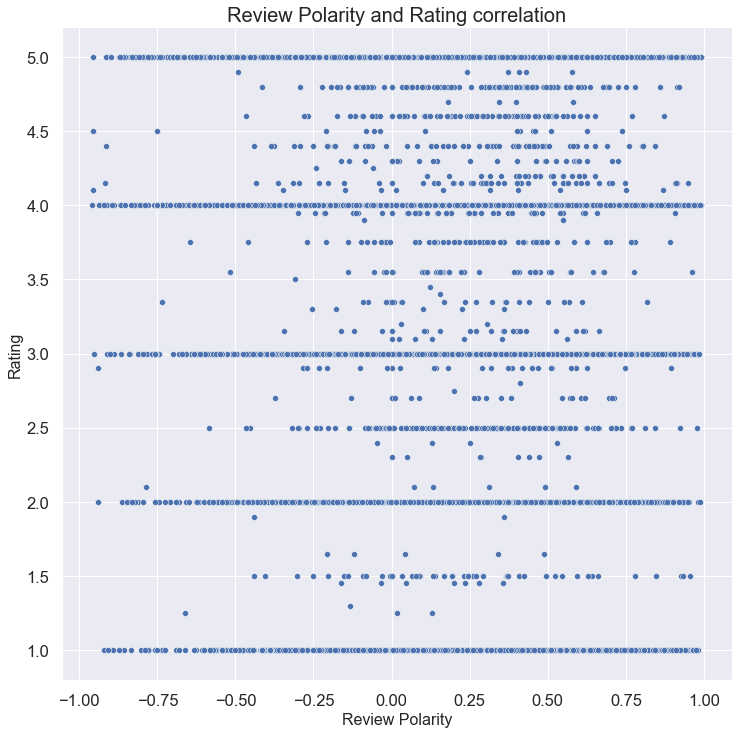

In [119]:
sns.scatterplot(y = "rating", x = "review polarity", data=df_vader)
plt.title("Review Polarity and Rating correlation", fontsize = 20)
plt.xlabel('Review Polarity', fontsize=16)
plt.ylabel('Rating', fontsize=16)
plt.rcParams['figure.figsize'] = [12, 12]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


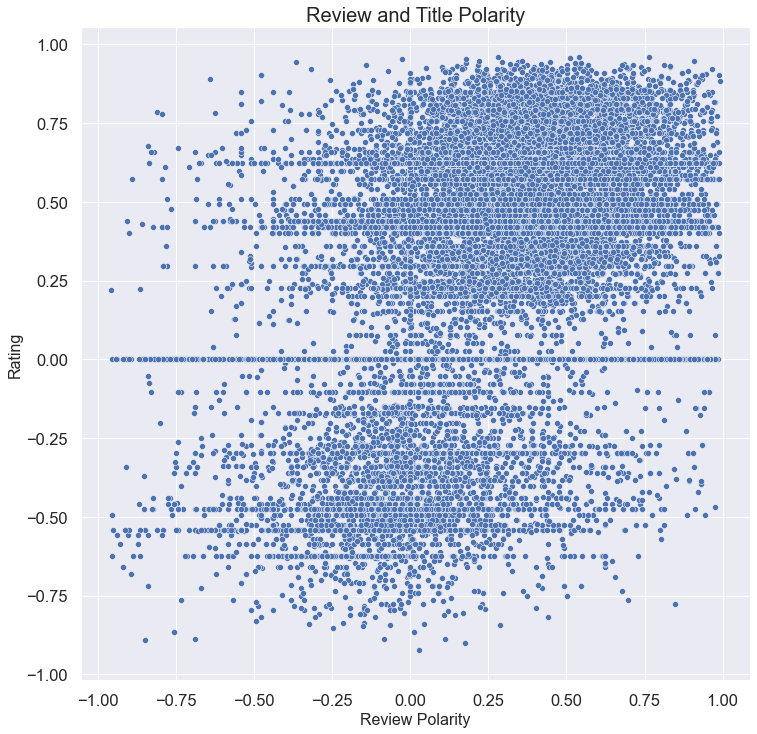

In [118]:
sns.scatterplot(y = "title polarity", x = "review polarity", data=df_vader)
plt.title("Review and Title Polarity", fontsize = 20)
plt.xlabel('Review Polarity', fontsize=16)
plt.ylabel('Rating', fontsize=16)
plt.rcParams['figure.figsize'] = [12, 12]

In [113]:
df_grouped = df_vader.groupby('name').mean()
df_grouped['total reviews'] = df_vader.groupby('name').count()['rating']

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [114]:
def polarity_binning(x):
    if x < -.4:
        return "Terrible"
    elif x < -.1:
        return "Bad"
    elif x < .1:
        return "Neutral"
    elif x < .5:
        return "Good"
    else:
        return "Great"

get_polarity = lambda x: polarity_binning(x)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [115]:
df_grouped["polarity_bin"] = df_grouped['review polarity'].apply(get_polarity)
df_grouped["popularity"] = df_grouped["rating"] * df_grouped["total reviews"]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Hotel Review Categories')

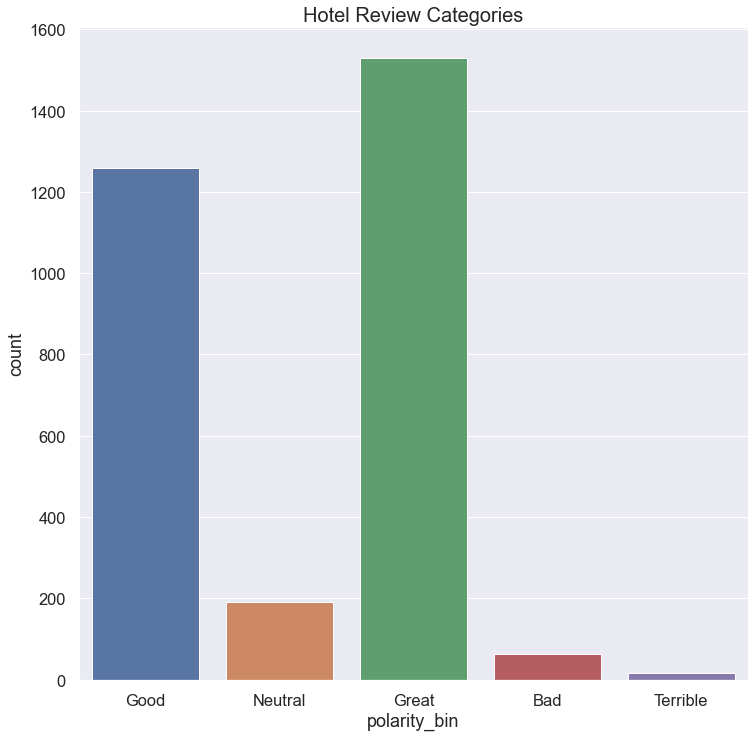

In [125]:
import seaborn as sns
plt.rcParams['figure.figsize'] = [12, 12]
ax = sns.countplot(df_grouped.polarity_bin)

plt.title("Hotel Review Categories", fontsize = 20)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Total # of reviews and polarity correlation')

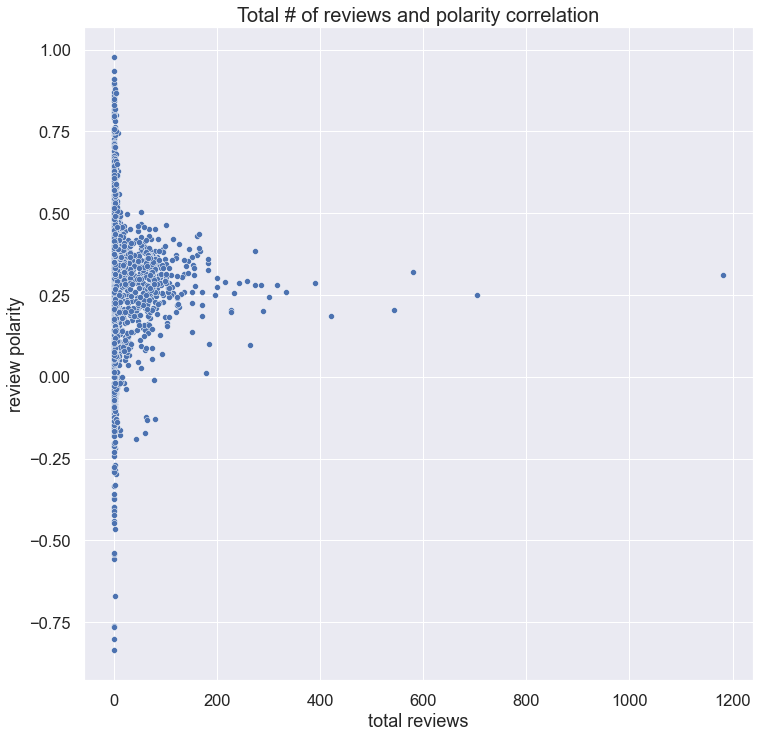

In [126]:
# Total number of reviews and polarity correlation
df_grouped[(df_grouped['polarity_bin'] == "Good") & (df_grouped['total reviews'] > 10)]
sns.scatterplot(y = "review polarity", x = "total reviews", data=df_grouped)
plt.title("Total # of reviews and polarity correlation", fontsize = 20)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Text and Title polarity')

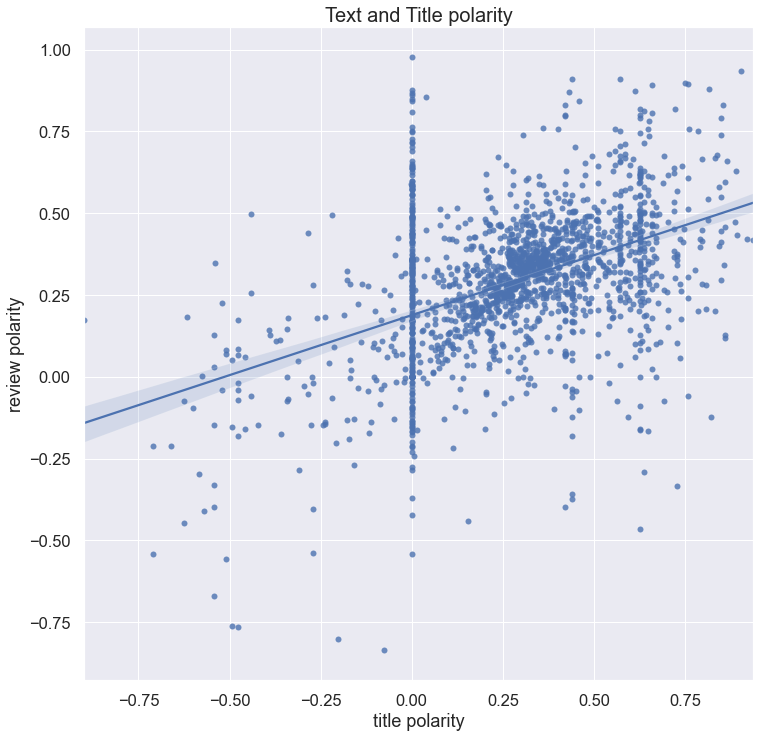

In [127]:
# Text and Title polarity
sns.regplot(y = "review polarity", x = "title polarity", data=df_grouped)
plt.title("Text and Title polarity", fontsize = 20)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Average Ratings')

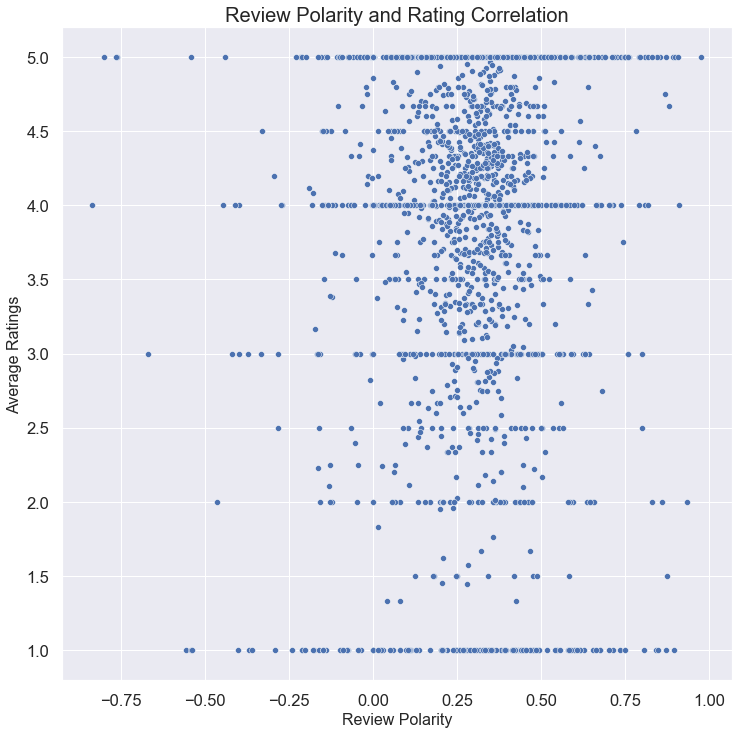

In [130]:
# Review Polarity and Rating correlation
sns.scatterplot(y = "rating", x = "review polarity", data=df_grouped)
plt.title("Review Polarity and Rating Correlation", fontsize = 20)
plt.xlabel('Review Polarity', fontsize=16)
plt.ylabel('Average Ratings', fontsize=16)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Average Ratings')

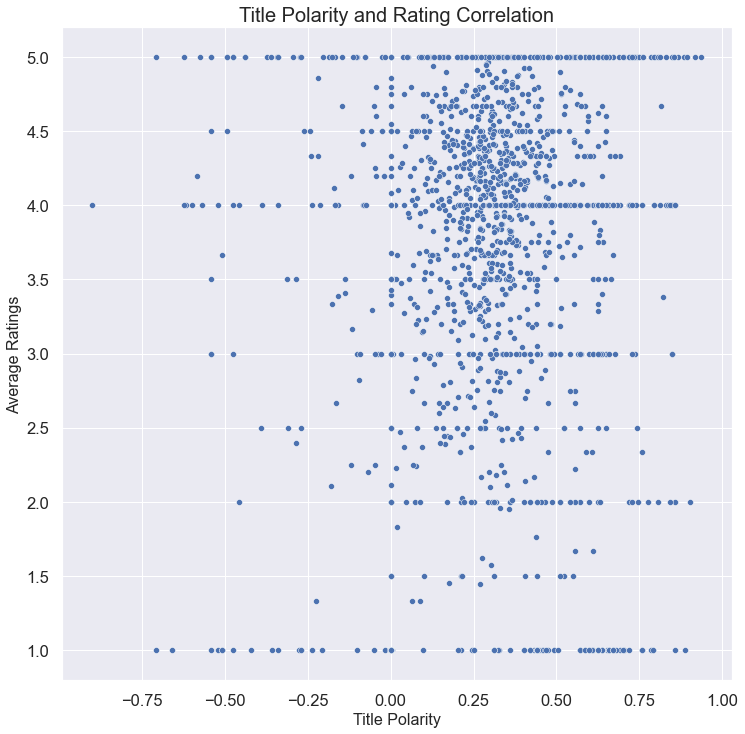

In [131]:
# Total Reviews and Average Ratings
sns.scatterplot(y = "rating", x = "title polarity", data=df_grouped)
plt.title("Title Polarity and Rating Correlation", fontsize = 20)
plt.xlabel('Title Polarity', fontsize=16)
plt.ylabel('Average Ratings', fontsize=16)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


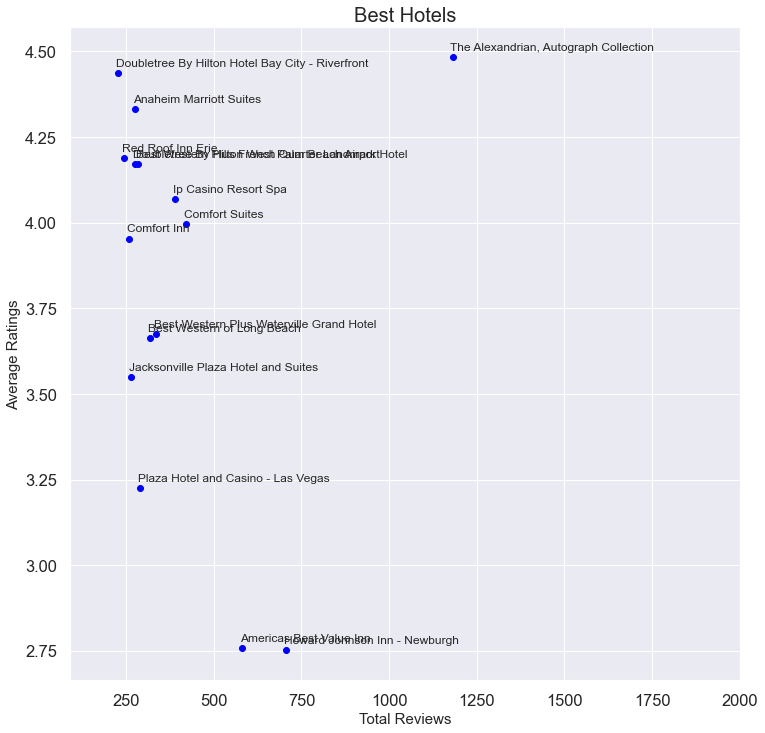

In [132]:
# Best Hotels
df_grouped.sort_values("popularity", ascending=False).iloc[0:10]
most_popular = df_grouped.sort_values("popularity", ascending=False).iloc[0:15]

for index, hotel in enumerate(most_popular.index):
    x = most_popular['total reviews'].loc[hotel]
    y = most_popular.rating.loc[hotel]
    plt.scatter(x, y, color='blue')
    plt.text(x-6, y+.02, hotel, fontsize=12)
    plt.xlim(90, 2000) 
    #plt.ylim(0,4.5) 
    
plt.title('Best Hotels', fontsize=20)
plt.xlabel('Total Reviews', fontsize=15)
plt.ylabel('Average Ratings', fontsize=15)

plt.show()

<h2>Map</h2>

In [ ]:
import json
import geojsonio
import folium


def createGeoJsonObject(df):
    points_dict = dict()
    points_dict['type'] = 'FeatureCollection'
    points_dict_features = list()
    points_dict['features'] = points_dict_features
    
    # Iterate through all the (lat,long) pairs
    for idx, row in df.iterrows():
        
        item = dict()
        item['type'] = 'Feature'
        
        # Assign point ids
        item['properties'] = {'point_id' : idx}
        
        # Assign point coordinates
        geometry = dict()
        geometry['type'] = 'Point'
        
        lat = row['latitude']
        long = row['longitude']
        
        geometry['coordinates'] = [long, lat]
        
        item['geometry'] = geometry
        
        points_dict_features.append(item)
        
    return points_dict

In [ ]:
hotels_json = createGeoJsonObject(df)

In [ ]:
m = folium.Map(location = [12.376187, 45.421611],zoom_start = 10)
m.choropleth(geo_data = hotels_json, data = sizes,
             columns =['Pick-up Zone', 'Number of Pickups'],
             key_on = 'feature.properties.point_id',
             fill_color = 'RdYlGn', fill_opacity = 0.7, line_opacity = 0.8,
             legend_name = 'Distribution of Incidents')
folium.LayerControl().add_to(m)

m